# Phase transformation in Ti

In this notebook, the hcp-bcc phase transformation is explored. The EAM potential used will be:

[Mendelev, M. I., T. L. Underwood, and G. J. Ackland. “Development of an Interatomic Potential for the Simulation of Defects, Plasticity, and Phase Transformations in Titanium.” The Journal of Chemical Physics 145, no. 15 (October 21, 2016): 154102.](https://doi.org/10.1063/1.4964654)

The input file is shown below:

```
element: 'Ti'
mass: 47.867
calculations:
- mode: ts
  temperature: [1000, 1300]
  pressure: [0]
  lattice: [BCC]
  repeat: [13, 13, 13]
  state: solid
  nsims: 3
- mode: ts
  temperature: [1000, 1300]
  pressure: [0]
  lattice: [HCP]
  repeat: [10, 10, 10]
  iso: [False]
  state: solid
  nsims: 3

md:
  pair_style: eam/fs
  pair_coeff: "* * /home/users/menonsqr/Repos/pytint/examples/Ti_EAM/Ti.eam.fs Ti"
  timestep: 0.001
  tdamp: 0.1
  pdamp: 0.1
  te: 25000
  ts: 50000

queue:
  scheduler: local
  cores: 14
  commands:
    - source ~/.zghrc
    - conda activate py3
```

The input file is similar to the previous examples. The major difference is the `iso` keyword in the HCP structure. The keyword is set to False.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

## HCP iso vs aniso

In [21]:
ht, hfe, hferr = np.loadtxt("ts-HCP-1000-0/temperature_sweep.dat", unpack=True)
h1t, h1fe, h1ferr = np.loadtxt("hcp-iso/temperature_sweep.dat", unpack=True)
bt, bfe, bferr = np.loadtxt("ts-BCC-1000-0/temperature_sweep.dat", unpack=True)

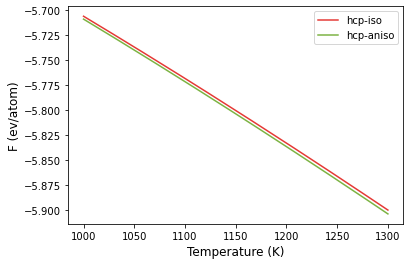

In [22]:
plt.plot(h1t, h1fe, color="#E53935", label="hcp-iso")
plt.plot(ht, hfe, color="#7CB342", label="hcp-aniso")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

## HCP -> BCC phase transformation

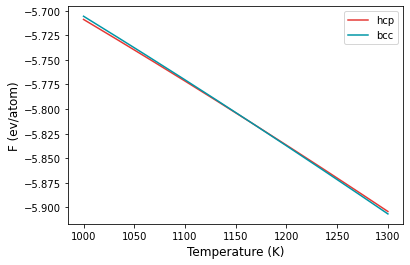

In [23]:
plt.plot(ht, hfe, color="#E53935", label="hcp")
plt.plot(bt, bfe, color="#0097A7", label="bcc")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

In [25]:
args = np.argsort(np.abs(hfe-bfe))
ht[args[0]]

1165.446639496055